In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import math

In [ ]:
start_date = dt.datetime(2020,1,1)
end_date = dt.datetime(2024,10,20)

#loading from yahoo finance
data = yf.download("BTC-USD",start_date, end_date)

pd.set_option('display.max_rows', 4)
pd.set_option('display.max_columns',5)
print(data)
print(end_date)

[*********************100%***********************]  1 of 1 completed

Price                         Adj Close         Close  ...          Open  \
Ticker                          BTC-USD       BTC-USD  ...       BTC-USD   
Date                                                   ...                 
2020-01-01 00:00:00+00:00   7200.174316   7200.174316  ...   7194.892090   
2020-01-02 00:00:00+00:00   6985.470215   6985.470215  ...   7202.551270   
...                                 ...           ...  ...           ...   
2024-10-18 00:00:00+00:00  68418.789062  68418.789062  ...  67419.109375   
2024-10-19 00:00:00+00:00  68362.734375  68362.734375  ...  68418.976562   

Price                           Volume  
Ticker                         BTC-USD  
Date                                    
2020-01-01 00:00:00+00:00  18565664997  
2020-01-02 00:00:00+00:00  20802083465  
...                                ...  
2024-10-18 00:00:00+00:00  36857165014  
2024-10-19 00:00:00+00:00  14443497908  

[1754 rows x 6 columns]
2024-10-20 00:00:00


In [ ]:
# Setting 80 percent data for training
training_data_len = math.ceil(len(data) * .8)
training_data_len

#Splitting the dataset
train_data = data[:training_data_len].iloc[:,:1]
test_data = data[training_data_len:].iloc[:,:1]
print(train_data.shape, test_data.shape)
train_data

(1404, 1) (350, 1)


Price,Adj Close
Ticker,BTC-USD
Date,
2020-01-01 00:00:00+00:00,7200.174316
2020-01-02 00:00:00+00:00,6985.470215
...,...
2023-11-03 00:00:00+00:00,34732.324219
2023-11-04 00:00:00+00:00,35082.195312


In [ ]:
# Selecting Open Price values
dataset_train = train_data.Open.values
# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_train = scaler.fit_transform(dataset_train)

print(scaled_train[:5])

[[0.03505058]
 [0.03517303]
 [0.0316857 ]
 [0.0374565 ]
 [0.03849693]]


In [ ]:
# Selecting Open Price values
dataset_test = test_data.Open.values
# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1,1))
# Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test)
print(*scaled_test[:5])

[0.16155317] [0.150062] [0.17962296] [0.16111776] [0.09526402]


In [ ]:
X_train = []
y_train = []
for i in range(50, len(scaled_train)):
    X_train.append(scaled_train[i-50:i, 0])
    y_train.append(scaled_train[i, 0])
    if i <= 51:
        print(X_train)
        print(y_train)
        print()

[array([0.03505058, 0.03517303, 0.0316857 , 0.0374565 , 0.03849693,
       0.03849694, 0.0442243 , 0.05051161, 0.04923833, 0.04597698,
       0.05051569, 0.04845438, 0.05095665, 0.05017582, 0.06111814,
       0.06091249, 0.0595172 , 0.0627468 , 0.06297436, 0.0591882 ,
       0.0584585 , 0.05982099, 0.05880479, 0.05440678, 0.05495919,
       0.05374876, 0.05747232, 0.06251198, 0.06962575, 0.06896298,
       0.07203741, 0.06944807, 0.07014295, 0.06942131, 0.06859247,
       0.06684297, 0.07378822, 0.07551782, 0.07659009, 0.07772242,
       0.08174603, 0.07759447, 0.08313423, 0.08507793, 0.08328073,
       0.08491638, 0.07812668, 0.0788842 , 0.07496188, 0.08219751])]
[0.07397214114450647]

[array([0.03505058, 0.03517303, 0.0316857 , 0.0374565 , 0.03849693,
       0.03849694, 0.0442243 , 0.05051161, 0.04923833, 0.04597698,
       0.05051569, 0.04845438, 0.05095665, 0.05017582, 0.06111814,
       0.06091249, 0.0595172 , 0.0627468 , 0.06297436, 0.0591882 ,
       0.0584585 , 0.05982099, 0.05

In [ ]:
X_test = []
y_test = []
for i in range(50, len(scaled_test)):
    X_test.append(scaled_test[i-50:i, 0])
    y_test.append(scaled_test[i, 0])

In [ ]:
# The data is converted to Numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)

X_train : (1082, 50, 1) y_train : (1082, 1)


In [ ]:
# The data is converted to numpy array
X_test, y_test = np.array(X_test), np.array(y_test)

#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)

X_test : (232, 50, 1) y_test : (232, 1)


In [ ]:
# importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers.legacy import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [ ]:
# initializing the RNN
regressor = Sequential()

# adding RNN layers and dropout regularization
regressor.add(SimpleRNN(units = 50,
                        activation = "tanh",
                        return_sequences = True,
                        input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50,
                        activation = "tanh",
                        return_sequences = True))

regressor.add(SimpleRNN(units = 50,
                        activation = "tanh",
                        return_sequences = True))

regressor.add( SimpleRNN(units = 50))

# adding the output layer
regressor.add(Dense(units = 1,activation='sigmoid'))

# compiling RNN
regressor.compile(optimizer = SGD(learning_rate=0.01,
                                  decay=1e-6,
                                  momentum=0.9,
                                  nesterov=True),
                  loss = "mean_squared_error")

# fitting the model
regressor.fit(X_train, y_train, epochs = 20, batch_size = 2)
regressor.summary()

Epoch 1/20
541/541 [==============================] - 24s 39ms/step - loss: 0.0087
Epoch 2/20
541/541 [==============================] - 24s 44ms/step - loss: 0.0028
Epoch 3/20
541/541 [==============================] - 21s 39ms/step - loss: 0.0023
Epoch 4/20
541/541 [==============================] - 26s 47ms/step - loss: 0.0020
Epoch 5/20
541/541 [==============================] - 20s 38ms/step - loss: 0.0018
Epoch 6/20
541/541 [==============================] - 23s 43ms/step - loss: 0.0017
Epoch 7/20
541/541 [==============================] - 21s 39ms/step - loss: 0.0016
Epoch 8/20
541/541 [==============================] - 24s 44ms/step - loss: 0.0016
Epoch 9/20
541/541 [==============================] - 20s 37ms/step - loss: 0.0014
Epoch 10/20
541/541 [==============================] - 19s 36ms/step - loss: 0.0013
Epoch 11/20
541/541 [==============================] - 22s 40ms/step - loss: 0.0014
Epoch 12/20
541/541 [==============================] - 20s 36ms/step - loss: 0.0013
E

In [ ]:
#Initialising the model LSTM
regressorLSTM = Sequential()

#Adding LSTM layers
regressorLSTM.add(LSTM(50,
                       return_sequences = True,
                       input_shape = (X_train.shape[1],1)))
regressorLSTM.add(LSTM(50,
                       return_sequences = False))
regressorLSTM.add(Dense(25))

#Adding the output layer
regressorLSTM.add(Dense(1))

#Compiling the model
regressorLSTM.compile(optimizer = 'adam',
                      loss = 'mean_squared_error',
                      metrics = ["accuracy"])

#Fitting the model
regressorLSTM.fit(X_train,
                  y_train,
                  batch_size = 1,
                  epochs = 12)
regressorLSTM.summary()

Epoch 1/12
1082/1082 [==============================] - 32s 26ms/step - loss: 0.0036 - accuracy: 0.0018
Epoch 2/12
1082/1082 [==============================] - 29s 27ms/step - loss: 0.0015 - accuracy: 0.0018
Epoch 3/12
1082/1082 [==============================] - 29s 27ms/step - loss: 0.0011 - accuracy: 0.0018
Epoch 4/12
1082/1082 [==============================] - 29s 27ms/step - loss: 0.0010 - accuracy: 0.0018
Epoch 5/12
1082/1082 [==============================] - 29s 27ms/step - loss: 9.4069e-04 - accuracy: 0.0018
Epoch 6/12
1082/1082 [==============================] - 31s 28ms/step - loss: 8.0756e-04 - accuracy: 0.0018
Epoch 7/12
1082/1082 [==============================] - 31s 28ms/step - loss: 7.7596e-04 - accuracy: 0.0018
Epoch 8/12
1082/1082 [==============================] - 30s 28ms/step - loss: 7.9859e-04 - accuracy: 0.0018
Epoch 9/12
1082/1082 [==============================] - 29s 27ms/step - loss: 7.9688e-04 - accuracy: 0.0018
Epoch 10/12
1082/1082 [=====================

In [ ]:
#Initialising the model GRU
regressorGRU = Sequential()

# GRU layers with Dropout regularisation
regressorGRU.add(GRU(units=50,
                     return_sequences=True,
                     input_shape=(X_train.shape[1],1),
                     activation='tanh'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units=50,
                     return_sequences=True,
                     activation='tanh'))

regressorGRU.add(GRU(units=50,
                     return_sequences=True,
                     activation='tanh'))

regressorGRU.add(GRU(units=50,
                     activation='tanh'))

# The output layer
regressorGRU.add(Dense(units=1,
                       activation='relu'))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(learning_rate=0.01,
                                   decay=1e-7,
                                   momentum=0.9,
                                   nesterov=False),
                     loss='mean_squared_error')

# Fitting the data
regressorGRU.fit(X_train,y_train,epochs=20,batch_size=1)
regressorGRU.summary()

Epoch 1/20
1082/1082 [==============================] - 60s 50ms/step - loss: 0.2252
Epoch 2/20
1082/1082 [==============================] - 53s 49ms/step - loss: 0.2257
Epoch 3/20
1082/1082 [==============================] - 54s 50ms/step - loss: 0.2257
Epoch 4/20
1082/1082 [==============================] - 60s 55ms/step - loss: 0.2257
Epoch 5/20
1082/1082 [==============================] - 55s 50ms/step - loss: 0.2257
Epoch 6/20
1082/1082 [==============================] - 54s 50ms/step - loss: 0.2257
Epoch 7/20
1082/1082 [==============================] - 55s 51ms/step - loss: 0.2257
Epoch 8/20
1082/1082 [==============================] - 55s 51ms/step - loss: 0.2257
Epoch 9/20
1082/1082 [==============================] - 54s 50ms/step - loss: 0.2257
Epoch 10/20
1082/1082 [==============================] - 57s 52ms/step - loss: 0.2257
Epoch 11/20
1082/1082 [==============================] - 55s 51ms/step - loss: 0.2257
Epoch 12/20
1082/1082 [==============================] - 55s 50

In [ ]:
# predictions with X_test data
y_RNN = regressor.predict(X_test)
y_LSTM = regressorLSTM.predict(X_test)
y_GRU = regressorGRU.predict(X_test)

8/8 [==============================] - 2s 22ms/step


In [ ]:
# scaling back from 0-1 to original
y_RNN_O = scaler.inverse_transform(y_RNN)
y_LSTM_O = scaler.inverse_transform(y_LSTM)
y_GRU_O = scaler.inverse_transform(y_GRU)

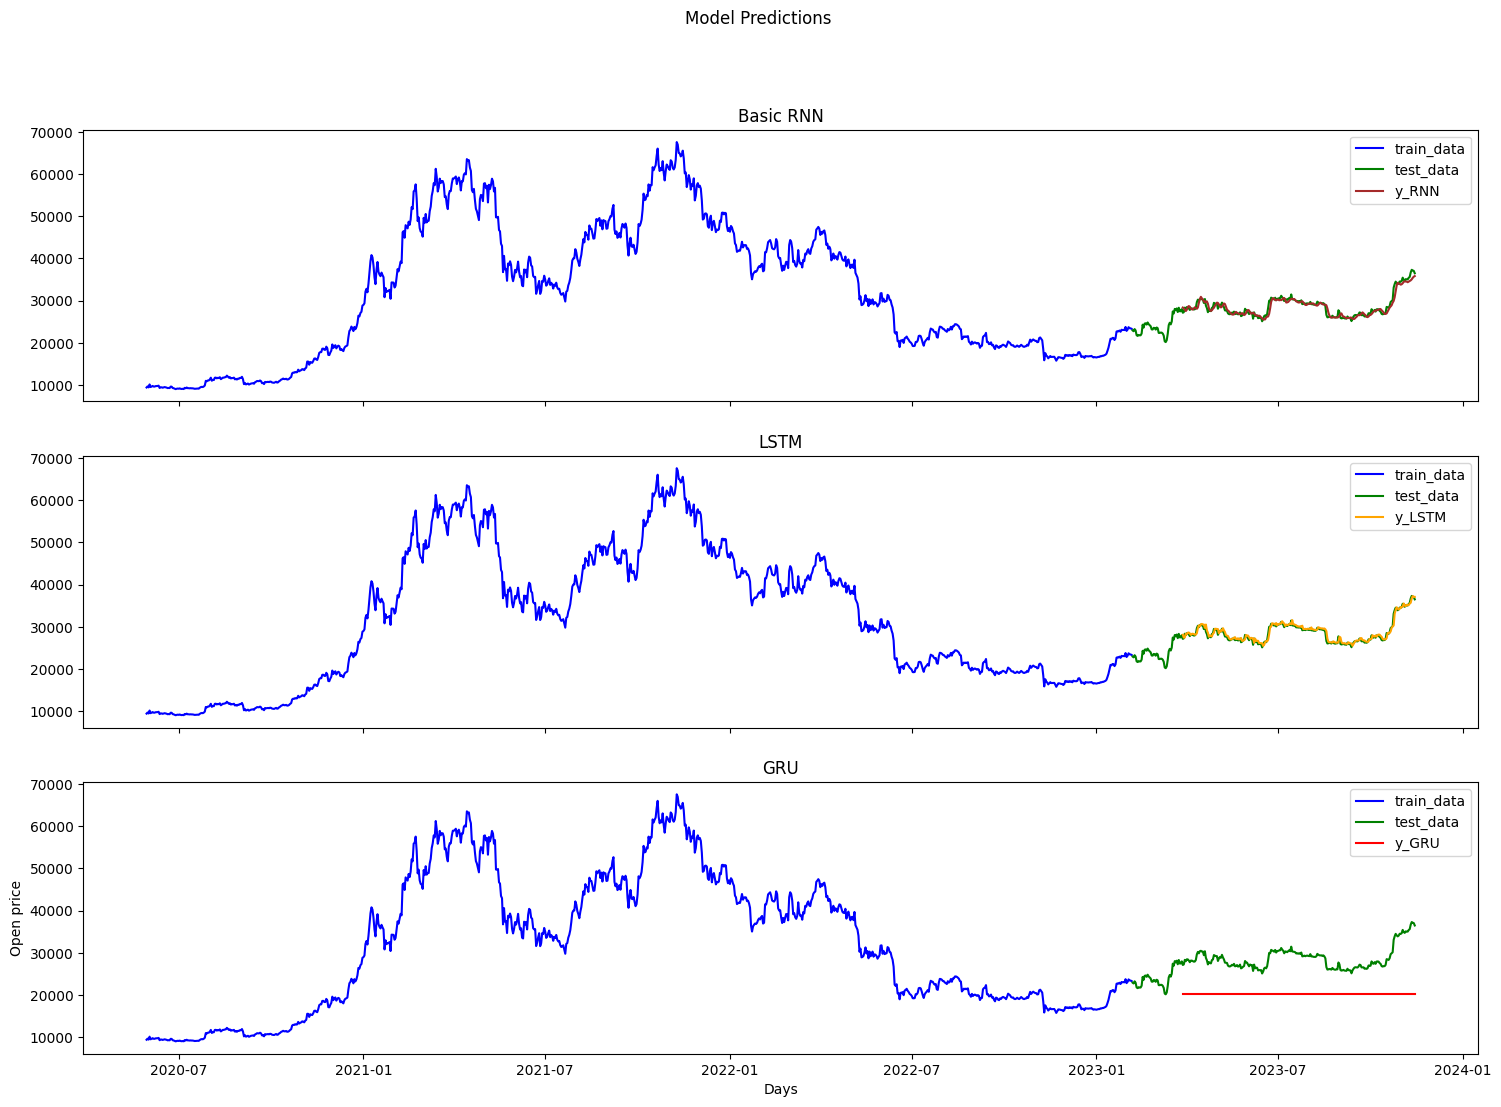

In [ ]:
fig, axs = plt.subplots(3,figsize =(18,12),sharex=True, sharey=True)
fig.suptitle('Model Predictions')

#Plot for RNN predictions
axs[0].plot(train_data.index[150:], train_data.Open[150:], label = "train_data", color = "b")
axs[0].plot(test_data.index, test_data.Open, label = "test_data", color = "g")
axs[0].plot(test_data.index[50:], y_RNN_O, label = "y_RNN", color = "brown")
axs[0].legend()
axs[0].title.set_text("Basic RNN")

#Plot for LSTM predictions
axs[1].plot(train_data.index[150:], train_data.Open[150:], label = "train_data", color = "b")
axs[1].plot(test_data.index, test_data.Open, label = "test_data", color = "g")
axs[1].plot(test_data.index[50:], y_LSTM_O, label = "y_LSTM", color = "orange")
axs[1].legend()
axs[1].title.set_text("LSTM")

#Plot for GRU predictions
axs[2].plot(train_data.index[150:], train_data.Open[150:], label = "train_data", color = "b")
axs[2].plot(test_data.index, test_data.Open, label = "test_data", color = "g")
axs[2].plot(test_data.index[50:], y_GRU_O, label = "y_GRU", color = "red")
axs[2].legend()
axs[2].title.set_text("GRU")

plt.xlabel("Days")
plt.ylabel("Open price")

plt.show()